**Reproduction of Figure 4 from Bachmann *et al.***

This Colaboratory notebook creates an SED-ML file to partially reproduce  Figure 4 from Bachmann *et al.* 2011([Link](https://doi.org/10.1038/msb.2011.50)).

Version: 2.0

In [ ]:
# install Tellurium
!pip3 install tellurium

In [ ]:
# import required packages
import os
import tellurium as te
import phrasedml

In [ ]:
# mount Google Drive if necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set working directory to a subfolder "experiment" of the folder containing this file, change file path for workingDir as required
workingDir = '/content/drive/My Drive/bachmann_archiv/Group4_GenerationSEDML/Tellurium/experiment/'
os.chdir(workingDir)

In [21]:
# retrieve SBML model from model folder and set as reference for phraSEDML
sbml = "../model/Bachmann2011.xml"
ant_str = te.sbmlToAntimony(sbml)
sbml_str = te.antimonyToSBML(ant_str)
phrasedml.setReferencedSBML('../model/Bachmann2011.xml', sbml_str)
# print(sbml_str)

True

In [19]:
# create phraSEDML string as template for SED-ML
# pJAK2 / pEPOR need to be defined as new entities, not included in model (formula in Supplementary Information)
# parameter SHP1oe does not exist in model
# initial value for SOCS3 / CIS were estimated based on initial plots
phrasedml_str = """
    model1 = model "{}"
    model2 = model model1 with SOCS3oe=1, SOCS3=300
    model3 = model model1 with CISoe=1, CIS=580
    
    sim1 = simulate uniform(0, 120, 1000)
    sim2 = simulate uniform(0, 60, 1000)
    task1 = run sim1 on model1
    task2 = run sim1 on model2
    task3 = run sim1 on model3

    plot "Figure 4 (top) SOCS3" task1.time vs task1.SOCS3, task2.SOCS3
    plot "Figure 4 (top) pSTAT5" task1.time vs task1.pSTAT5, task2.pSTAT5
    plot "Figure 4 (top) CIS" task1.time vs task1.CIS, task2.CIS
    plot "Figure 4 (middle) CIS" task1.time vs task1.CIS, task3.CIS
    plot "Figure 4 (middle) pSTAT5" task1.time vs task1.pSTAT5, task3.pSTAT5
    plot "Figure 4 (middle) SOCS3" task1.time vs task1.SOCS3, task3.SOCS3
    

""".format('../model/Bachmann2011.xml')

In [20]:
# convert to SED-ML and create SED-ML file in working directory
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    raise RuntimeError(phrasedml.getLastError())
print(sedml_str)

with open(os.path.join(workingDir, 'Fig4.sedml'), 'wb') as f:
    f.write(sedml_str.encode('utf-8'))


<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.1.1 with libSBML version 5.19.1. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-2.version-1" source="../model/Bachmann2011.xml"/>
    <model id="model2" language="urn:sedml:language:sbml.level-2.version-1" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='SOCS3oe']/@value" newValue="1"/>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfSpecies/sbml:species[@id='SOCS3']/@initialConcentration" newValue="300"/>
      </listOfChanges>
    </model>
    <model id="model3" language="urn:sedml:language:sbml.level-2.version-1" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='CISoe']/@value" newValue="1"/>
        <chan

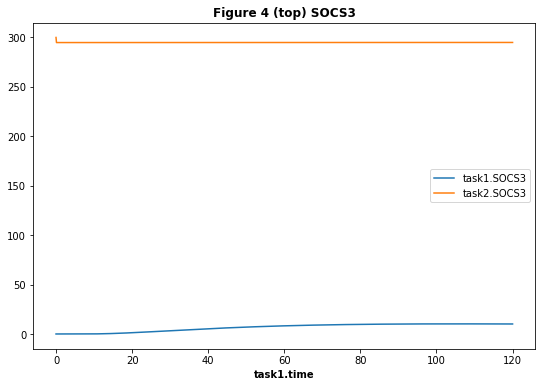

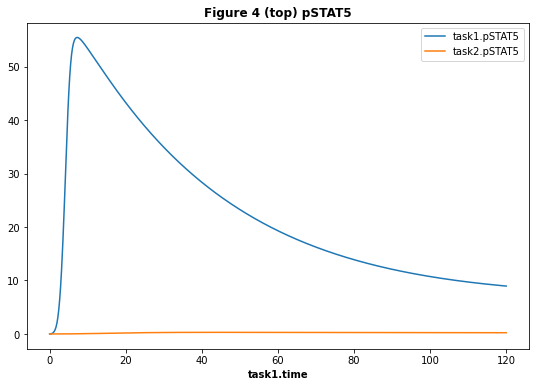

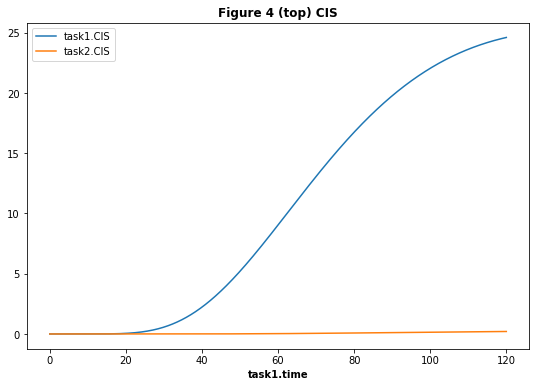

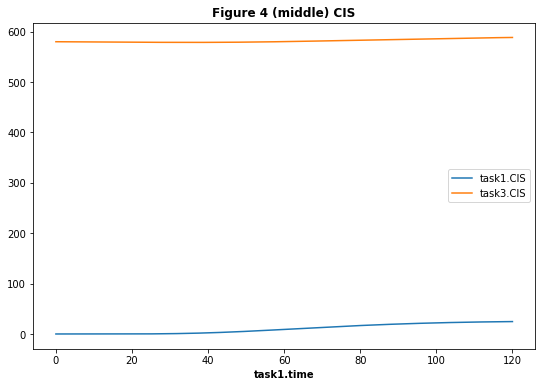

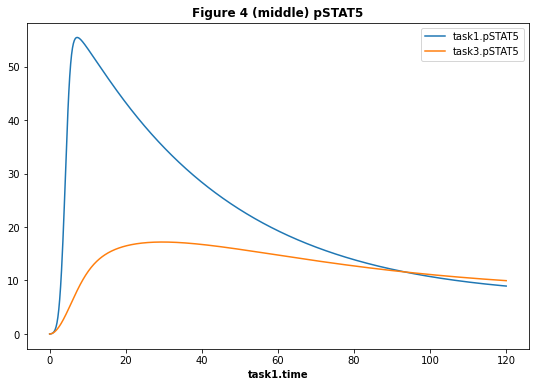

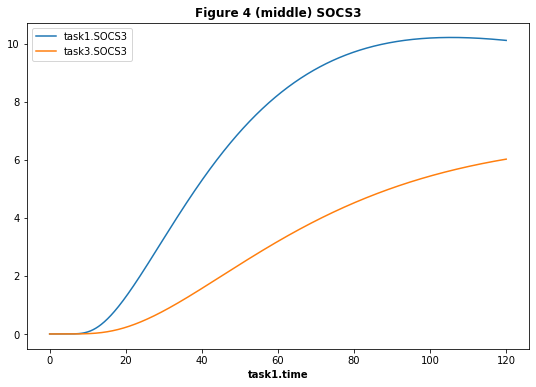

In [22]:
# run the SED-ML file based on the referenced SBML file in ../models/
te.executeSEDML(sedml_str)